In [2]:
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# set seed for reproducibility
np.random.seed(0)

In [3]:
nfl = pd.read_csv('./NFL Play by Play 2009-2017 (v4).csv')

/var/folders/8m/tdc0gjb14qq878phzzsj20l80000gn/T/ipykernel_56082/4085111398.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl = pd.read_csv('./NFL Play by Play 2009-2017 (v4).csv')


In [5]:
nfl.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [5]:
nfl['Date'].head()

0    2009-09-10
1    2009-09-10
2    2009-09-10
3    2009-09-10
4    2009-09-10
Name: Date, dtype: object

In [7]:
nfl['Date'].dtype

dtype('O')

dtype for the date column is "O" which stands for "Object". Pandas uses this dtype for various type of data including string. So, python doesn't know this column is date.

But there is specific type for data on pandas: " datetime64 "

## pd.to_datetime()
#### strftime guideline
%d: day , %m:month, %y: year, %Y: 4 digit year

%H: hour, %M: minute, %S: second, %f microsecond

https://strftime.org


In [9]:
nfl['parsed_date'] = pd.to_datetime(nfl['Date'], format="%Y-%m-%d")

In [10]:
nfl['parsed_date'].head()

0   2009-09-10
1   2009-09-10
2   2009-09-10
3   2009-09-10
4   2009-09-10
Name: parsed_date, dtype: datetime64[ns]

### infer_datetime_format=True

When there are multiple date types and there is not clear structure you can use:

pd.to_datetime(DataFrame.col, infer_datetime_format=True)

#### Extract info from datetime column

In [13]:
year_of_date=nfl['parsed_date'].dt.year
year_of_date.head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: parsed_date, dtype: int64

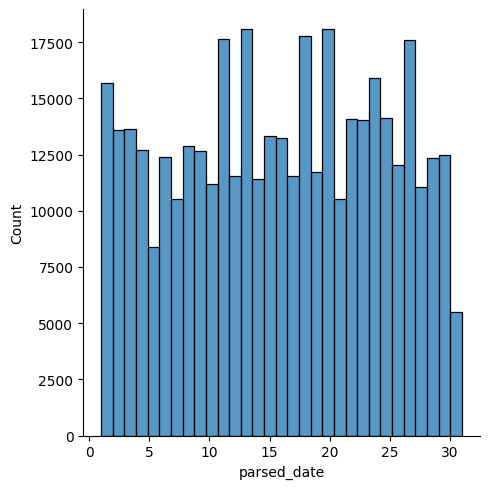

In [14]:
#Plot day of the date - This is an easy way to make sure "to_datetime" has extracted date info correctly
day_of_month = nfl['parsed_date'].dt.day
sns.displot(day_of_month,kde=False,bins=31)
